# **$\color{green}{\text{Student Name: Aysha AlRemeithi}}$**


$\color{blue}{\text{Batch 3 - Group B (2022) }}$

### Question (5): Part (D)

In [1]:
#standard imports
import numpy as np
import matplotlib.pyplot as plt

Problem constants
In this part, define functions that generate the matrices A, L, H, M



In [2]:
#dynamics:
def get_A(x):
    return 1 #TODO COMPLETE

def get_L(x):
    return -1 #TODO COMPLETE

def get_H(x):
    return 3*(x-1)**2  #TODO COMPLETE

def get_M(x):
    return 1 #TODO COMPLETE

#Define noise variances
V = 0.05**2
W = 0.1**2  # Var(w(0))
j0=0.1

#Define measurments
measurment_z=[4.04, 3.81, 3.95, 3.90, 3.88, 3.88, 3.90, 3.55, 3.18]


Now we'll run the kalman filter. Note that this also includes a simulation of the rocket ship, and we generate the measurements from the simulation

In [3]:
numSteps = 9  # how many time steps will we run the estimator?

### EKF:
#initialize: ##TODO
hat_x_m = 1  # prior estimate of the state
P_m = 0  # variance of prior

# where we'll store the history our estimate
hist_hat_x_m = np.zeros([numSteps+1,1])  

# where we'll store the history our estimate's variance
hist_P_m = np.zeros([numSteps+1,1]) 

# where we'll store the history our true (simulated) system state:
hist_true_x = np.zeros([numSteps+1,1])  

#the system true state:
true_state_x = np.random.normal(1,0)

#save the measurments:
hist_z = np.zeros([numSteps+1,1])

#save the prior:
hist_hat_x_m[0,0] = hat_x_m
hist_P_m[0,0] = P_m
hist_true_x[0,0] = true_state_x

for k in np.arange(1,numSteps+1):

    ## SIMULATION START
    #process noise
    v = np.random.normal(0, 0.05)
    #simulate the rocket:
    new_x = true_state_x - j0 - v

    true_state_x = new_x
    
    #generate the measurement:
    w = np.random.normal(0, 0.1)
    #z = 4 + ((true_state_x)-1)**3 + w
    z=measurment_z[k-1]
    
    ## SIMULATION END
    
    hist_z[k,0]=z
    
    ## EKF START
        
    #step 1: Kalman filter prediction
    #our current input u(k-1):    
    hat_x_p = hat_x_m - j0 - 0  #TODO!
    A = get_A(hat_x_p)
    L = get_L(hat_x_p)
    P_p = A*P_m*A + L*V*L # (no transpose, all scalars)
    
    #step 2: Kalman filter measurement update:
    H = get_H(hat_x_p)
    M = get_M(hat_x_p)
    K = P_p*H*1/(H*P_p*H + W) #(no transpose, all scalars)
    
    predictedMeas = 4 + ((hat_x_p)-1)**3 + 0 #TODO!
    
    hat_x_m = hat_x_p + K*(z-predictedMeas)
    I = 1
    P_m = (I - K*H)*P_p*(I - K*H) + K*W*K # (no transpose, all scalars)
    ## EKF END

    #store the variables for plotting. Don't modify the below lines:
    hist_hat_x_m[k,0] = hat_x_m
    hist_P_m[k,0] = P_m
    hist_true_x[k,0] = true_state_x

Make the plots:

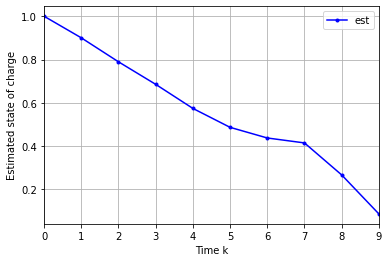

In [4]:
fig, ax = plt.subplots(1,1,sharex=True)

ax.plot(hist_hat_x_m[:,0],'b.-',label="est")
#ax.plot(hist_hat_x_m[:,0]+np.sqrt(hist_P_m[:,0]),'g:',label="1 sigma")
#ax.plot(hist_hat_x_m[:,0]-np.sqrt(hist_P_m[:,0]),'g:',)
#ax.plot(hist_true_x[:,0],'c.-',label="true")
#ax.plot(z,'rx', label="measurments")

ax.set_xlim(0,9)
ax.set_xlabel('Time k')
ax.set_ylabel('Estimated state of charge')
ax.legend()
ax.grid(True)

plt.show()

Plot the estimation error
Position:

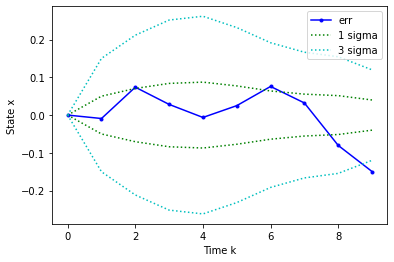

In [5]:
fig, ax = plt.subplots(1,1,sharex=True)

ax.plot(hist_hat_x_m[:,0]-hist_true_x[:,0],'b.-',label="err")
ax.plot(+np.sqrt(hist_P_m[:,0]),'g:',label="1 sigma")
ax.plot(-np.sqrt(hist_P_m[:,0]),'g:',)
ax.plot(+3*np.sqrt(hist_P_m[:,0]),'c:',label="3 sigma")
ax.plot(-3*np.sqrt(hist_P_m[:,0]),'c:',)

ax.set_xlabel('Time k')
ax.set_ylabel('State x')
ax.legend()


plt.show()

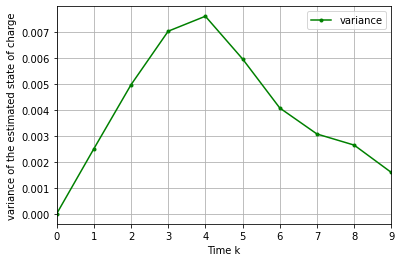

In [6]:
fig, ax = plt.subplots(1,1,sharex=True)

ax.plot(hist_P_m[:,0],'g.-',label="variance")
ax.set_xlabel('Time k')
ax.set_xlim(0,9)
ax.set_ylabel('variance of the estimated state of charge')
ax.legend()
ax.grid(True)


### Question (5): Part (E)

In [7]:
j0=0.1
sigma=0.05

mean_q=1-9*j0
var_q=9*sigma**2

print(mean_q)
print(var_q)

0.09999999999999998
0.022500000000000006


In [8]:
print(hist_hat_x_m[9])
print(hist_P_m[9])

[0.08672571]
[0.00159282]


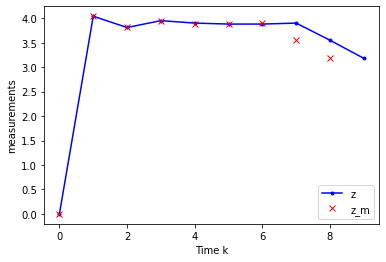

In [9]:
measurements_z=np.array([0, 4.04,  3.81, 3.95, 3.88, 3.88,3.90, 3.55,3.18 ])

fig, ax = plt.subplots(1,1,sharex=True)

ax.plot(hist_z[:,0],'b.-',label="z")

ax.plot(measurements_z,'rx',label="z_m")

ax.set_xlabel('Time k')
ax.set_ylabel('measurements')
ax.legend()


plt.show()